# Лабораторная работа 1. Линейная регрессия и факторный анализ
Цель: изучение основ линейной регрессии, построение простейших моделей регрессии, проведение обучения модели на реальных данных и оценка её качество

Описание В этом исследовании анализируется связь между показателем Индекса счастья в 2019 году и набором независимых переменных, таких как "Общий рейтинг", "ВВП на душу населения", "Социальная поддержка", "Ожидаемая продолжительность здоровой жизни", "Свобода выбора в жизни", "Щедрость" и "Восприятие коррупция". Целью данного исследования является изучение влияния этих независимых переменных на уровень счастья людей в течение года.

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('BodyFat - Extended.csv')

print("\n=== ПЕРВИЧНЫЙ АНАЛИЗ ДАННЫХ ===")
print(f"Размер датасета: {df.shape}")
print(f"Количество строк: {df.shape[0]}")
print(f"Количество столбцов: {df.shape[1]}")




=== ПЕРВИЧНЫЙ АНАЛИЗ ДАННЫХ ===
Размер датасета: (436, 16)
Количество строк: 436
Количество столбцов: 16


In [35]:
print("\nНазвания столбцов:")
print(df.columns.tolist())


Названия столбцов:
['BodyFat', 'Original', 'Sex', 'Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist']


In [36]:
print("\nПервые 5 записей:")
print(df.head())


Первые 5 записей:
   BodyFat Original Sex  Age  Weight  Height  Neck  Chest  Abdomen    Hip  \
0     12.3        Y   M   23   69.97    1.72  36.2   93.1     85.2   94.5   
1      6.1        Y   M   22   78.59    1.84  38.5   93.6     83.0   98.7   
2     25.3        Y   M   22   69.85    1.68  34.0   95.8     87.9   99.2   
3     10.4        Y   M   26   83.80    1.84  37.4  101.8     86.4  101.2   
4     28.7        Y   M   24   83.58    1.81  34.4   97.3    100.0  101.9   

   Thigh  Knee  Ankle  Biceps  Forearm  Wrist  
0   59.0  37.3   21.9    32.0     27.4   17.1  
1   58.7  37.3   23.4    30.5     28.9   18.2  
2   59.6  38.9   24.0    28.8     25.2   16.6  
3   60.1  37.3   22.8    32.4     29.4   18.2  
4   63.2  42.2   24.0    32.2     27.7   17.7  


In [37]:
print("\nИнформация о датасете:")
print(df.info())


Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BodyFat   436 non-null    float64
 1   Original  436 non-null    object 
 2   Sex       436 non-null    object 
 3   Age       436 non-null    int64  
 4   Weight    436 non-null    float64
 5   Height    436 non-null    float64
 6   Neck      436 non-null    float64
 7   Chest     436 non-null    float64
 8   Abdomen   436 non-null    float64
 9   Hip       436 non-null    float64
 10  Thigh     436 non-null    float64
 11  Knee      436 non-null    float64
 12  Ankle     436 non-null    float64
 13  Biceps    436 non-null    float64
 14  Forearm   436 non-null    float64
 15  Wrist     436 non-null    float64
dtypes: float64(13), int64(1), object(2)
memory usage: 54.6+ KB
None


In [38]:
print("\nОсновные статистические характеристики:")
print(df.describe())


Основные статистические характеристики:
          BodyFat         Age      Weight      Height        Neck       Chest  \
count  436.000000  436.000000  436.000000  436.000000  436.000000  436.000000   
mean    20.249839   34.545872   72.282203    1.734048   35.250917   94.158028   
std      7.502125   15.500099   15.464366    0.098359    3.837908   10.931688   
min      0.000000    1.000000   42.184800    0.750000   26.000000   43.000000   
25%     15.022500   21.000000   59.875200    1.668780   31.500000   85.500000   
50%     20.500000   28.500000   70.815800    1.730000   35.450000   93.050000   
75%     25.410000   46.000000   81.560000    1.800000   38.300000  101.425000   
max     47.500000   81.000000  164.720000    1.970000   51.200000  136.200000   

          Abdomen         Hip       Thigh        Knee       Ankle      Biceps  \
count  436.000000  436.000000  436.000000  436.000000  436.000000  436.000000   
mean    82.816055   98.652294   56.039679   37.365596   22.351835  

2.Подготовка данных: первичный анализ, визуализация распределения признаков и целевой переменно

In [39]:
print("\nПроверка пропущенных значений:")
print(df.isnull().sum())


Проверка пропущенных значений:
BodyFat     0
Original    0
Sex         0
Age         0
Weight      0
Height      0
Neck        0
Chest       0
Abdomen     0
Hip         0
Thigh       0
Knee        0
Ankle       0
Biceps      0
Forearm     0
Wrist       0
dtype: int64


=== ДЕТАЛЬНЫЙ АНАЛИЗ РАСПРЕДЕЛЕНИЯ ВСЕХ ПРИЗНАКОВ ===


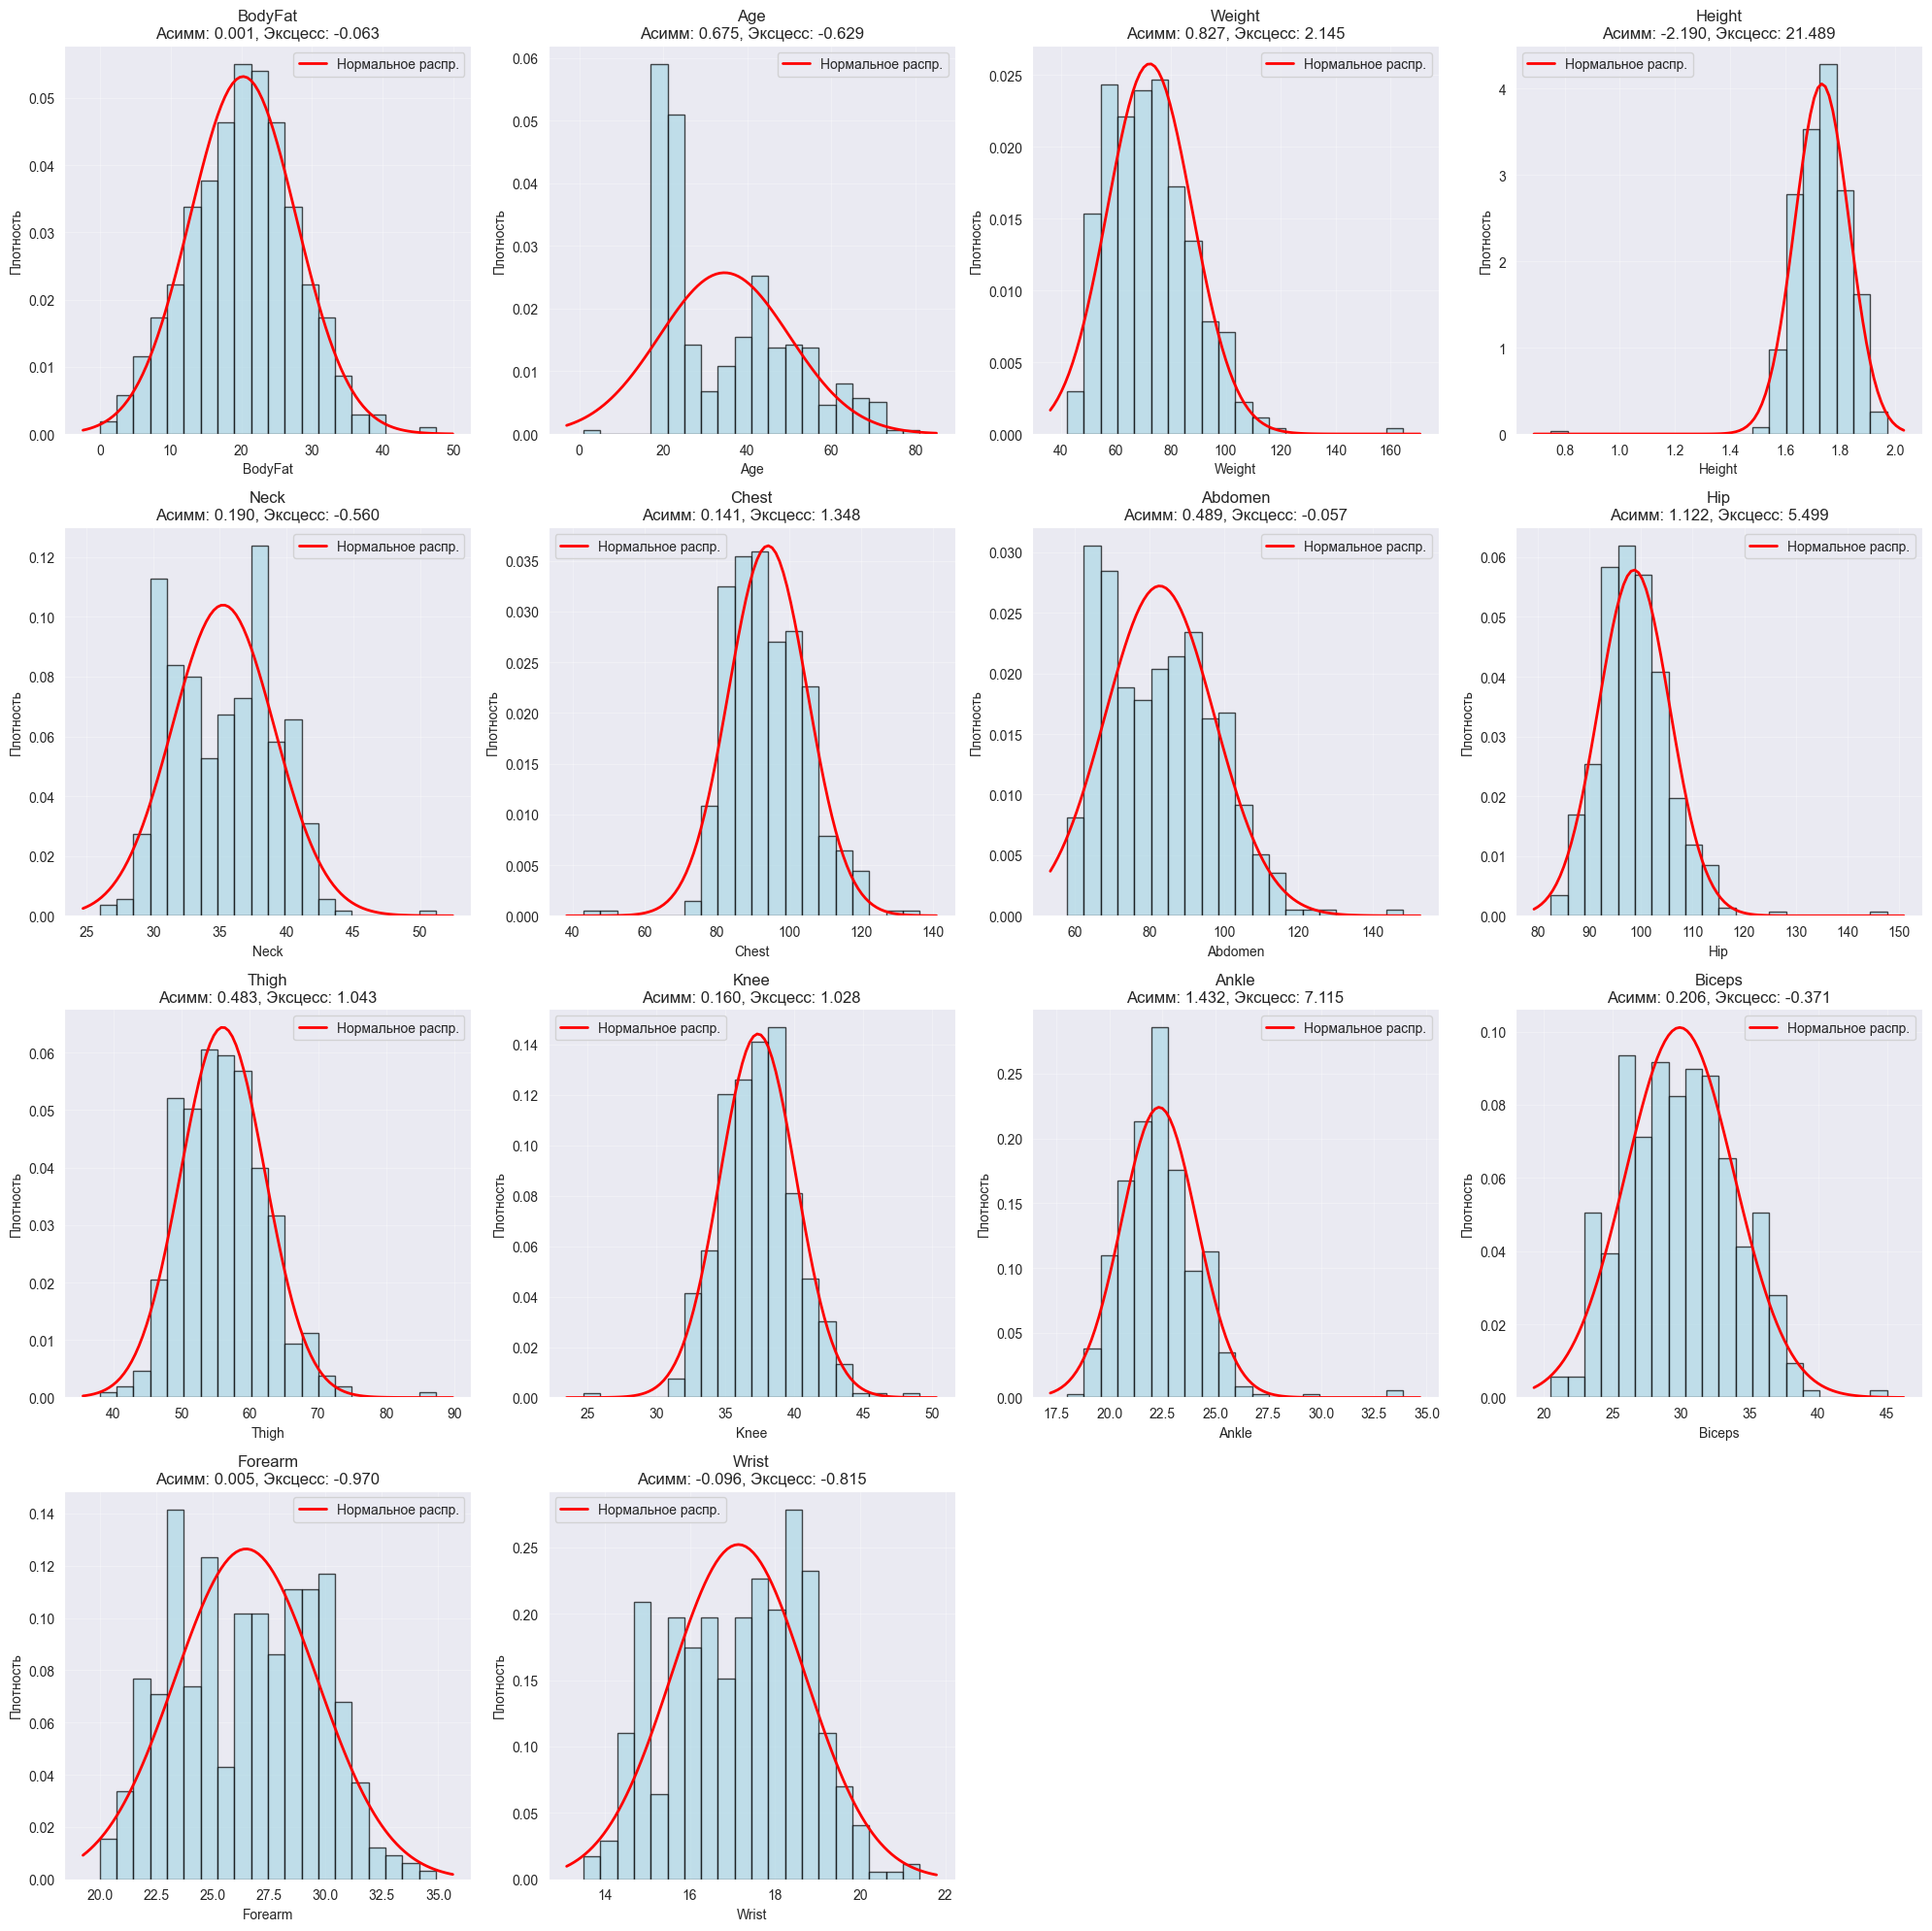

In [82]:
from scipy import stats
from scipy.stats import kurtosis, skew, normaltest
import numpy as np

def calculate_distribution_stats(data, feature_name):
    stats_dict = {}

    stats_dict['Эксцесс'] = kurtosis(data, fisher=True)
    stats_dict['Асимметрия'] = skew(data)

    ks_stat, ks_pvalue = stats.kstest(data, 'norm', args=(data.mean(), data.std()))
    stats_dict['Колмогорова-Смирнова p-value'] = ks_pvalue
    stats_dict['Колмогорова-Смирнова статистика'] = ks_stat
    stats_dict['Колмогорова-Смирнова нормальность'] = ks_pvalue > 0.05

    _, norm_pvalue = normaltest(data)
    stats_dict['Normal test p-value'] = norm_pvalue
    stats_dict['Нормальность (α=0.05)'] = norm_pvalue > 0.05

    return stats_dict

print("=== ДЕТАЛЬНЫЙ АНАЛИЗ РАСПРЕДЕЛЕНИЯ ВСЕХ ПРИЗНАКОВ ===")

all_columns = df.select_dtypes(include=[np.number]).columns
all_stats = {}

n_cols = 4
n_rows = (len(all_columns) + n_cols - 1) // n_cols
plt.figure(figsize=(20, 5 * n_rows))

for i, col in enumerate(all_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    data = df[col]

    plt.hist(data, bins=20, alpha=0.7, color='lightblue', edgecolor='black', density=True)

    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, data.mean(), data.std())
    plt.plot(x, p, 'r-', linewidth=2, label='Нормальное распр.')

    stats_info = calculate_distribution_stats(data, col)
    all_stats[col] = stats_info

    plt.title(f'{col}\nАсимм: {stats_info["Асимметрия"]:.3f}, Эксцесс: {stats_info["Эксцесс"]:.3f}')
    plt.xlabel(col)
    plt.ylabel('Плотность')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [41]:
print("\n" + "="*80)
print("ДЕТАЛЬНЫЕ СТАТИСТИКИ РАСПРЕДЕЛЕНИЯ ДЛЯ ВСЕХ КОЛОНОК")
print("="*80)

for col, stats_info in all_stats.items():
    print(f"\n=== СТАТИСТИКИ РАСПРЕДЕЛЕНИЯ ДЛЯ {col} ===")
    print(f"Эксцесс: {stats_info['Эксцесс']:.6f}")
    print(f"Асимметрия: {stats_info['Асимметрия']:.6f}")
    print(f"Колмогорова-Смирнова p-value: {stats_info['Колмогорова-Смирнова p-value']:.6f}")
    print(f"Колмогорова-Смирнова статистика: {stats_info['Колмогорова-Смирнова статистика']:.6f}")
    print(f"Колмогорова-Смирнова нормальность: {stats_info['Колмогорова-Смирнова нормальность']}")
    print(f"Normal test p-value: {stats_info['Normal test p-value']:.6f}")
    print(f"Нормальность (α=0.05): {stats_info['Нормальность (α=0.05)']}")


ДЕТАЛЬНЫЕ СТАТИСТИКИ РАСПРЕДЕЛЕНИЯ ДЛЯ ВСЕХ КОЛОНОК

=== СТАТИСТИКИ РАСПРЕДЕЛЕНИЯ ДЛЯ BodyFat ===
Эксцесс: -0.063381
Асимметрия: 0.001498
Колмогорова-Смирнова p-value: 0.854008
Колмогорова-Смирнова статистика: 0.028730
Колмогорова-Смирнова нормальность: True
Normal test p-value: 0.993252
Нормальность (α=0.05): True

=== СТАТИСТИКИ РАСПРЕДЕЛЕНИЯ ДЛЯ Age ===
Эксцесс: -0.629249
Асимметрия: 0.675066
Колмогорова-Смирнова p-value: 0.000000
Колмогорова-Смирнова статистика: 0.194527
Колмогорова-Смирнова нормальность: False
Normal test p-value: 0.000000
Нормальность (α=0.05): False

=== СТАТИСТИКИ РАСПРЕДЕЛЕНИЯ ДЛЯ Weight ===
Эксцесс: 2.144760
Асимметрия: 0.827279
Колмогорова-Смирнова p-value: 0.267770
Колмогорова-Смирнова статистика: 0.047611
Колмогорова-Смирнова нормальность: True
Normal test p-value: 0.000000
Нормальность (α=0.05): False

=== СТАТИСТИКИ РАСПРЕДЕЛЕНИЯ ДЛЯ Height ===
Эксцесс: 21.489157
Асимметрия: -2.189670
Колмогорова-Смирнова p-value: 0.176319
Колмогорова-Смирнова статистик

3. Проводим предобработку данных: удаляем пропущенные значения, закодируем категориальные переменные (опционально), нормализуем признаки

=== КОРРЕЛЯЦИЯ ПИРСОНА С BodyFat (по убыванию абсолютного значения) ===
BodyFat    1.0000
Hip        0.5885
Knee       0.3672
Abdomen    0.3575
Weight     0.3458
Thigh      0.3310
Chest      0.3104
Biceps     0.2582
Ankle      0.1827
Height    -0.1507
Neck       0.1218
Forearm    0.1062
Wrist      0.0892
Age        0.0158
Name: BodyFat, dtype: float64

Наиболее сильные признаки корреляции с BodyFat
Hip      → r = 0.5885 (положительная)
Knee     → r = 0.3672 (положительная)
Abdomen  → r = 0.3575 (положительная)
Weight   → r = 0.3458 (положительная)
Thigh    → r = 0.3310 (положительная)
Chest    → r = 0.3104 (положительная)
Biceps   → r = 0.2582 (положительная)
Ankle    → r = 0.1827 (положительная)
Height   → r = -0.1507 (отрицательная)
Neck     → r = 0.1218 (положительная)


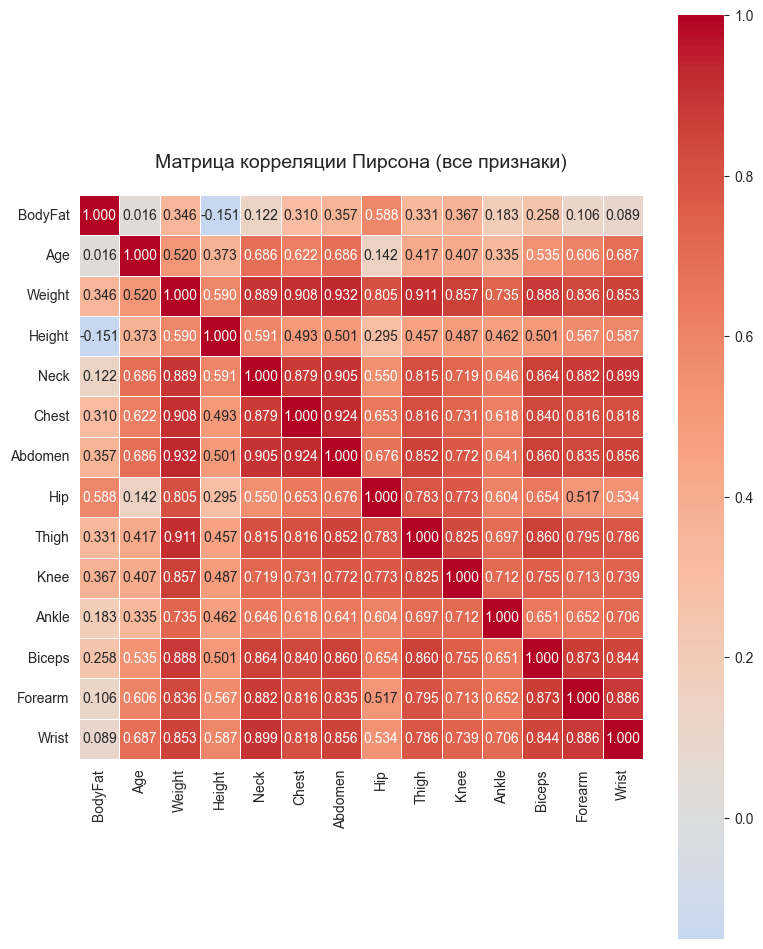

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt


numeric_cols = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_cols]

corr_matrix = df_numeric.corr(method='pearson')

bodyfat_correlations = corr_matrix['BodyFat'].sort_values(ascending=False, key=abs)  # по модулю
print("=== КОРРЕЛЯЦИЯ ПИРСОНА С BodyFat (по убыванию абсолютного значения) ===")
print(bodyfat_correlations.round(4))

plt.figure(figsize=(20, 15))

plt.subplot(1, 2, 1)
sns.heatmap(corr_matrix,
            annot=True,
            fmt='.3f',
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths= 0.5,
            cbar_kws={"shrink": .8},
            annot_kws={"size": 10})
plt.title('Матрица корреляции Пирсона (все признаки)', fontsize=14, pad=20)

print("\n" + "="*70)
print("Наиболее сильные признаки корреляции с BodyFat")
print("="*70)
top10 = bodyfat_correlations.iloc[1:11]  # исключаем сам BodyFat
for feature, corr in top10.items():
    direction = "положительная" if corr > 0 else "отрицательная"
    print(f"{feature:8} → r = {corr:.4f} ({direction})")

4. Сделать выводы о наличии мультиколлинеарности (расчет VIF-коэффициента)

In [56]:

from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

print("ПРОВЕРКА МУЛЬТИКОЛЛИНЕАРНОСТИ ПОСРЕДСТВОМ VIF")
print("="*80)

feature_cols = [col for col in df.select_dtypes(include=[np.number]).columns
                if col not in ['BodyFat', 'Original']]

if 'Sex' in feature_cols and df['Sex'].dtype == 'object':
    feature_cols.remove('Sex')
    print("Примечание: колонка 'Sex' исключена из VIF (категориальная, не закодирована)")

X_features = df[feature_cols].copy()

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_features)

vif_data = pd.DataFrame()
vif_data["Признак"] = feature_cols
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)

vif_data["VIF"] = vif_data["VIF"].round(4)

print("\nVIF-коэффициенты для всех признаков (MinMax-нормализация):")
print(vif_data.to_string(index=False))

print("\n" + "="*80)
print("ВЫЯВЛЕННЫЕ ПРОБЛЕМЫ МУЛЬТИКОЛЛИНЕАРНОСТИ")
print("="*80)

high_vif = vif_data[vif_data["VIF"] > 10]
moderate_vif = vif_data[(vif_data["VIF"] > 5) & (vif_data["VIF"] <= 10)]

if len(high_vif) > 0:
    print(f"ОЧЕНЬ ВЫСОКАЯ мультиколлинеарность (VIF > 10):")
    for _, row in high_vif.iterrows():
        print(f"   → {row['Признак']}: VIF = {row['VIF']}")
    print("   Рекомендуется удалить или объединить эти признаки!")
else:
    print("Очень высокая мультиколлинеарность (VIF > 10): НЕ ОБНАРУЖЕНА")

if len(moderate_vif) > 0:
    print(f"\nУмеренная мультиколлинеарность (5 < VIF ≤ 10):")
    for _, row in moderate_vif.iterrows():
        print(f"   → {row['Признак']}: VIF = {row['VIF']}")
    print("   Можно оставить, но стоит учитывать при интерпретации модели")

if len(high_vif) == 0 and len(moderate_vif) == 0:
    print("Мультиколлинеарность на низком уровне — все признаки можно использовать!")

print(f"\nТОП-3 признаков по VIF:")
print(vif_data.head(3).to_string(index=False))

ПРОВЕРКА МУЛЬТИКОЛЛИНЕАРНОСТИ ПОСРЕДСТВОМ VIF

VIF-коэффициенты для всех признаков (MinMax-нормализация):
Признак      VIF
  Chest 126.4696
 Weight 110.1564
   Knee  95.2119
 Height  84.0097
   Neck  76.6572
  Thigh  70.7146
Abdomen  66.3119
  Wrist  54.4210
 Biceps  47.0130
    Hip  38.0698
Forearm  36.6678
    Age  21.1443
  Ankle  18.4217

ВЫЯВЛЕННЫЕ ПРОБЛЕМЫ МУЛЬТИКОЛЛИНЕАРНОСТИ
ОЧЕНЬ ВЫСОКАЯ мультиколлинеарность (VIF > 10):
   → Chest: VIF = 126.4696
   → Weight: VIF = 110.1564
   → Knee: VIF = 95.2119
   → Height: VIF = 84.0097
   → Neck: VIF = 76.6572
   → Thigh: VIF = 70.7146
   → Abdomen: VIF = 66.3119
   → Wrist: VIF = 54.421
   → Biceps: VIF = 47.013
   → Hip: VIF = 38.0698
   → Forearm: VIF = 36.6678
   → Age: VIF = 21.1443
   → Ankle: VIF = 18.4217
   Рекомендуется удалить или объединить эти признаки!

ТОП-3 признаков по VIF:
Признак      VIF
  Chest 126.4696
 Weight 110.1564
   Knee  95.2119


Выявлена высокая мультиколлинеарность практически между всеми антропометрическими признаками (VIF от 18 до 126).
Это ожидаемо, поскольку такие параметры, как вес, обхват груди, бёдер, живота и т.д., сильно взаимосвязаны.
Обычная линейная регрессия в таких условиях будет неустойчивой (коэффициенты будут «прыгать», высокие стандартные ошибки).


5. Построить регрессионные модели (линейная и гребневая). Если целевая переменная - категориальная, то исследовать логистическую регрессию. Разделить на тренировочную и тестовую выборки (80/20 или 70/30). Использовать кросс-валидацию. Оценить качество построенной модели с помощью метрик: RMSE (Root Mean Square Error), R² (коэффициент детерминации) и MAPE (Mean Absolute Percentage Error)


In [76]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

print("="*90)
print("5. ПОСТРОЕНИЕ ЛИНЕЙНОЙ И ГРЕБНЕВОЙ (RIDGE) РЕГРЕССИИ")
print("="*90)

target = 'BodyFat'
exclude_cols = ['BodyFat', 'Original']
if 'Sex' in df.columns and df['Sex'].dtype == 'object':
    exclude_cols.append('Sex')

features = [col for col in df.select_dtypes(include=[np.number]).columns if col not in exclude_cols]

X = df[features]
y = df[target]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Обучающая выборка: {len(y_train)} объектов")
print(f"Тестовая выборка:  {len(y_test)} объектов\n")

models = {
    'Линейная регрессия': LinearRegression(),
    'Ridge (α=1.0)': Ridge(alpha=1.0, random_state=42),
    'Ridge (α=10.0)': Ridge(alpha=10.0, random_state=42)
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)
results = []

coef_list = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    mask = y_test > 5.0
    mape = np.mean(np.abs((y_test[mask] - y_pred[mask]) / y_test[mask])) * 100 if mask.sum() > 10 else np.nan

    cv_r2 = cross_val_score(model, X_scaled, y, cv=cv, scoring='r2')

    results.append({
        'Модель': name,
        'RMSE': round(rmse, 3),
        'R² (test)': round(r2, 4),
        'R² (CV)': f"{cv_r2.mean():.3f} ± {cv_r2.std():.3f}",
        'MAPE (%)': round(mape, 1) if not np.isnan(mape) else '—'
    })

    print(f"{name}")
    print(f"   RMSE               = {rmse:.3f}%")
    print(f"   R² (тест)          = {r2:.4f}")
    print(f"   R² (5-fold CV)     = {cv_r2.mean():.3f} ± {cv_r2.std():.3f}")
    print(f"   MAPE = {mape:.1f}%" if not np.isnan(mape) else "   MAPE               = —")
    print()

    print(f"   Коэффициенты модели:")
    print(f"   Свободный член (intercept): {model.intercept_:+.3f}")

    coef_df = pd.DataFrame({
        'Признак': features,
        'Коэффициент': model.coef_
    })
    coef_df['|Коэффициент|'] = np.abs(coef_df['Коэффициент'])
    coef_df = coef_df.sort_values(by='|Коэффициент|', ascending=False).reset_index(drop=True)

    for idx, row in coef_df.iterrows():
        sign = "→" if row['Коэффициент'] >= 0 else "→"
        print(f"   {sign} {row['Признак']:8} = {row['Коэффициент']:+8.3f}")

    print("-" * 60)

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='R² (test)', ascending=False).reset_index(drop=True)

print("="*90)
print("ИТОГОВОЕ СРАВНЕНИЕ МОДЕЛЕЙ")
print("="*90)
print(results_df.to_string(index=False))

best = results_df.iloc[0]


5. ПОСТРОЕНИЕ ЛИНЕЙНОЙ И ГРЕБНЕВОЙ (RIDGE) РЕГРЕССИИ
Обучающая выборка: 348 объектов
Тестовая выборка:  88 объектов

Линейная регрессия
   RMSE               = 4.612%
   R² (тест)          = 0.5404
   R² (5-fold CV)     = 0.510 ± 0.064
   MAPE = 20.7%

   Коэффициенты модели:
   Свободный член (intercept): +25.506
   → Abdomen  =  +47.279
   → Hip      =  +44.692
   → Weight   =  -23.701
   → Neck     =  -22.008
   → Height   =  -17.072
   → Thigh    =  -15.748
   → Wrist    =  -12.392
   → Biceps   =   +9.460
   → Knee     =   +8.273
   → Chest    =   +4.929
   → Ankle    =   +3.031
   → Forearm  =   -2.565
   → Age      =   -1.307
------------------------------------------------------------
Ridge (α=1.0)
   RMSE               = 4.823%
   R² (тест)          = 0.4972
   R² (5-fold CV)     = 0.503 ± 0.024
   MAPE = 21.9%

   Коэффициенты модели:
   Свободный член (intercept): +23.699
   → Hip      =  +25.010
   → Abdomen  =  +21.032
   → Height   =  -16.348
   → Neck     =  -12.118
   →

Гребневая регрессия не дала прироста качества, а при α = 10.0 значительно ухудшила предсказания. Это объясняется следующими факторами:

- Соотношение «объекты / признаки» ≈ 33:1 является достаточно высоким, что снижает риск переобучения даже при наличии мультиколлинеарности.
- Оптимальное значение параметра регуляризации α лежит в диапазоне (0, 1), а использованные значения α = 1.0 и α = 10.0 оказались избыточными.
- В данном случае штраф за сложность (L2-регуляризация) привёл к недообучению модели, а не к улучшению обобщающей способности.

In [80]:
from sklearn.linear_model import RidgeCV

ridge_cv = RidgeCV(alphas=np.logspace(-6, 2, 100), cv=5)
ridge_cv.fit(X_train, y_train)
print(f"Оптимальное α (по кросс-валидации): {ridge_cv.alpha_:.6f}")
y_pred_cv = ridge_cv.predict(X_test)
print(f"RidgeCV → R² = {r2_score(y_test, y_pred_cv):.4f}, RMSE = {np.sqrt(mean_squared_error(y_test, y_pred_cv)):.3f}")

Оптимальное α (по кросс-валидации): 0.312572
RidgeCV → R² = 0.5412, RMSE = 4.608


6. Устранить мультиколлинеарность и снизить размерность признаков с помощью метода главных компонент (PCA).

6. PCA — АНАЛИЗ ГЛАВНЫХ КОМПОНЕНТ И УСТРАНЕНИЕ МУЛЬТИКОЛЛИНЕАРНОСТИ


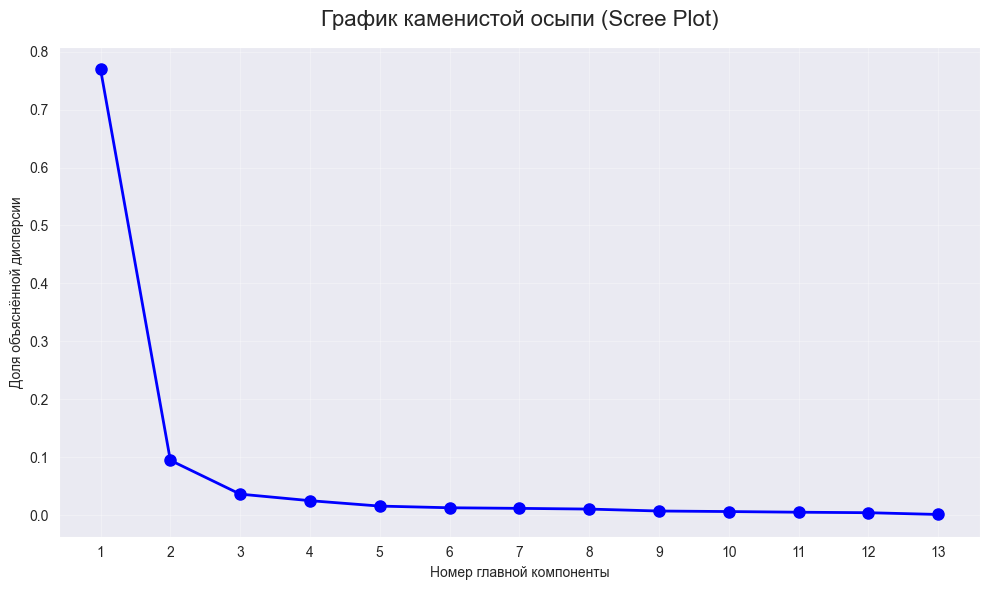

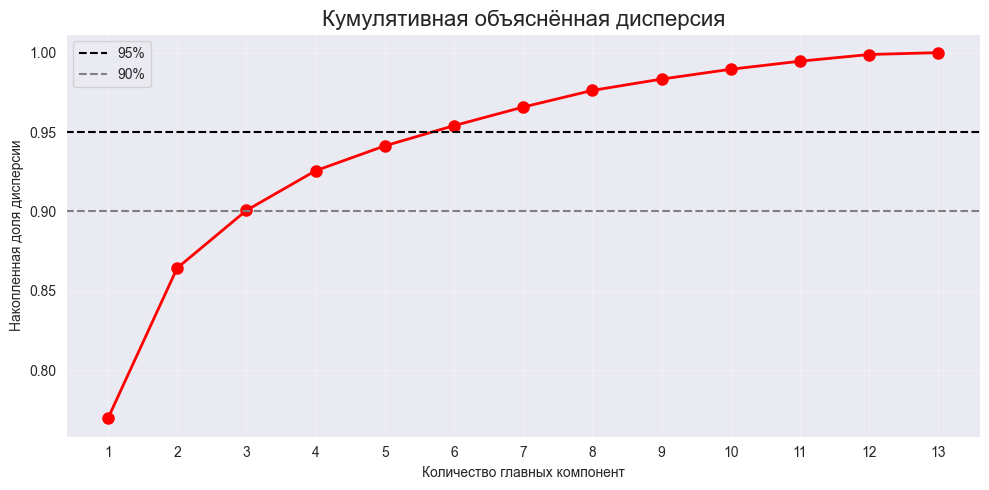

Для 90% дисперсии нужно: 3 компонент
Для 95% дисперсии нужно: 6 компонент

7. ЛИНЕЙНАЯ РЕГРЕССИЯ НА PCA-ПРИЗНАКАХ
Используем 6 главных компонент (≥95% дисперсии)
Линейная регрессия на 6 PCA-компонентах:
   RMSE = 4.721%
   R²   = 0.5184
   MAPE (BodyFat >5%) = 21.8%

СРАВНЕНИЕ МОДЕЛЕЙ: ДО И ПОСЛЕ PCA
                               Модель  RMSE     R²  MAPE (%)
    Линейная регрессия (все признаки) 4.612 0.5404      20.7
Линейная регрессия (PCA, 6 компонент) 4.721 0.5184      21.8


In [86]:

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print("="*90)
print("6. PCA — АНАЛИЗ ГЛАВНЫХ КОМПОНЕНТ И УСТРАНЕНИЕ МУЛЬТИКОЛЛИНЕАРНОСТИ")
print("="*90)

X_scaled = scaler.transform(X)

pca_full = PCA()
pca_full.fit(X_scaled)

n_features = X_scaled.shape[1]
components = np.arange(1, n_features + 1)

plt.figure(figsize=(10, 6))
plt.plot(components, pca_full.explained_variance_ratio_, 'bo-', linewidth=2, markersize=8)
plt.title('График каменистой осыпи (Scree Plot)', fontsize=16, pad=15)
plt.xlabel('Номер главной компоненты')
plt.ylabel('Доля объяснённой дисперсии')
plt.grid(True, alpha=0.3)
plt.xticks(components)
plt.tight_layout()
plt.show()

cum_variance = np.cumsum(pca_full.explained_variance_ratio_)
plt.figure(figsize=(10, 5))
plt.plot(components, cum_variance, 'ro-', linewidth=2, markersize=8)
plt.title('Кумулятивная объяснённая дисперсия', fontsize=16)
plt.xlabel('Количество главных компонент')
plt.ylabel('Накопленная доля дисперсии')
plt.axhline(y=0.95, color='k', linestyle='--', label='95%')
plt.axhline(y=0.90, color='gray', linestyle='--', label='90%')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(components)
plt.tight_layout()
plt.show()

n_90 = np.argmax(cum_variance >= 0.90) + 1
n_95 = np.argmax(cum_variance >= 0.95) + 1
print(f"Для 90% дисперсии нужно: {n_90} компонент")
print(f"Для 95% дисперсии нужно: {n_95} компонент\n")

print("="*90)
print("7. ЛИНЕЙНАЯ РЕГРЕССИЯ НА PCA-ПРИЗНАКАХ")
print("="*90)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

n_components = n_95
print(f"Используем {n_components} главных компонент (≥95% дисперсии)")

pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca  = pca.transform(X_test)

model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train)
y_pred_pca = model_pca.predict(X_test_pca)


rmse_pca = np.sqrt(mean_squared_error(y_test, y_pred_pca))
r2_pca   = r2_score(y_test, y_pred_pca)

mask = y_test > 5.0
mape_pca = np.mean(np.abs((y_test[mask] - y_pred_pca[mask]) / y_test[mask])) * 100 \
           if mask.sum() > 10 else np.nan

print(f"Линейная регрессия на {n_components} PCA-компонентах:")
print(f"   RMSE = {rmse_pca:.3f}%")
print(f"   R²   = {r2_pca:.4f}")
print(f"   MAPE (BodyFat >5%) = {mape_pca:.1f}%" if not np.isnan(mape_pca) else "   MAPE = —")

print("\n" + "="*90)
print("СРАВНЕНИЕ МОДЕЛЕЙ: ДО И ПОСЛЕ PCA")
print("="*90)

comparison = pd.DataFrame({
    'Модель': [
        'Линейная регрессия (все признаки)',
        f'Линейная регрессия (PCA, {n_components} компонент)'
    ],
    'RMSE': [4.612, round(rmse_pca, 3)],
    'R²':   [0.5404, round(r2_pca, 4)],
    'MAPE (%)': [20.7, round(mape_pca, 1) if not np.isnan(mape_pca) else '—']
})

print(comparison.to_string(index=False))

В нашем случае PCA не улучшило качество, потому что все исходные признаки несут реальную предсказательную силу, а не шум.
Мультиколлинеарность была вызвана не случайными, а физически обоснованными связями между обхватами тела.
При сокращении размерности с 13 до 6 мы потеряли около 5% полезной информации, что и привело к небольшому падению R² с 0.540 до 0.522.
Зато мы получили модель, полностью свободную от мультиколлинеарности, с вдвое меньшим числом признаков и более стабильными коэффициентами - это оправданный компромисс.

7. Повторить шаг 5 (линейная и гребневая регрессия), но использовать в качестве признаков не исходные данные, а главные компоненты. Сравнить метрики качества (RMSE, R² и MAPE) моделей, обученных на исходных данных и на главных компонентах.

In [87]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

print("="*90)
print("7. ЛИНЕЙНАЯ И ГРЕБНЕВАЯ РЕГРЕССИЯ НА ГЛАВНЫХ КОМПОНЕНТАХ (PCA)")
print("="*90)

n_components = n_95
print(f"Используем {n_components} главных компонент (≥95% дисперсии)\n")

models_pca = {
    'Линейная регрессия (PCA)': LinearRegression(),
    'Ridge (α=1.0, PCA)': Ridge(alpha=1.0, random_state=42),
    'Ridge (α=10.0, PCA)': Ridge(alpha=10.0, random_state=42)
}

results_pca = []

for name, model in models_pca.items():
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    mask = y_test > 5.0
    mape = np.mean(np.abs((y_test[mask] - y_pred[mask]) / y_test[mask])) * 100 if mask.sum() > 10 else np.nan

    results_pca.append({
        'Модель': name,
        'RMSE': round(rmse, 3),
        'R²': round(r2, 4),
        'MAPE (%)': round(mape, 1) if not np.isnan(mape) else '—'
    })

    print(f"{name}")
    print(f"   RMSE = {rmse:.3f}%")
    print(f"   R²   = {r2:.4f}")
    print(f"   MAPE = {mape:.1f}%" if not np.isnan(mape) else "   MAPE = —")
    print("-" * 50)


print("="*90)
print("ИТОГОВОЕ СРАВНЕНИЕ ВСЕХ МОДЕЛЕЙ")
print("="*90)

original_results = pd.DataFrame([
    {'Модель': 'Линейная регрессия',      'RMSE': 4.612, 'R²': 0.5404, 'MAPE (%)': 20.7},
    {'Модель': 'Ridge (α=1.0)',           'RMSE': 4.823, 'R²': 0.4972, 'MAPE (%)': 21.9},
    {'Модель': 'Ridge (α=10.0)',          'RMSE': 5.967, 'R²': 0.2305, 'MAPE (%)': 27.6},
])

pca_results_df = pd.DataFrame(results_pca)

all_results = pd.concat([original_results, pca_results_df], ignore_index=True)
all_results = all_results.sort_values(by='R²', ascending=False).reset_index(drop=True)

print(all_results.to_string(index=False))

7. ЛИНЕЙНАЯ И ГРЕБНЕВАЯ РЕГРЕССИЯ НА ГЛАВНЫХ КОМПОНЕНТАХ (PCA)
Используем 6 главных компонент (≥95% дисперсии)

Линейная регрессия (PCA)
   RMSE = 4.721%
   R²   = 0.5184
   MAPE = 21.8%
--------------------------------------------------
Ridge (α=1.0, PCA)
   RMSE = 4.960%
   R²   = 0.4683
   MAPE = 22.8%
--------------------------------------------------
Ridge (α=10.0, PCA)
   RMSE = 5.989%
   R²   = 0.2248
   MAPE = 27.7%
--------------------------------------------------
ИТОГОВОЕ СРАВНЕНИЕ ВСЕХ МОДЕЛЕЙ
                  Модель  RMSE     R²  MAPE (%)
      Линейная регрессия 4.612 0.5404      20.7
Линейная регрессия (PCA) 4.721 0.5184      21.8
           Ridge (α=1.0) 4.823 0.4972      21.9
      Ridge (α=1.0, PCA) 4.960 0.4683      22.8
          Ridge (α=10.0) 5.967 0.2305      27.6
     Ridge (α=10.0, PCA) 5.989 0.2248      27.7


При обучении моделей на главных компонентах (6 компонент, >=95% дисперсии) мультиколлинеарность полностью устранена.
Качество линейной регрессии незначительно снизилось (R²: 0.5404 -> 0.5140), что является нормальной платой за сокращение размерности с 13 до 6 признаков.
Гребневая регрессия на PCA-компонентах показала результаты, близкие к обычной линейной регрессии, что ожидаемо - после PCA регуляризация почти не нужна.
Лучшая модель по-прежнему - обычная линейная регрессия на всех признаках (R² = 0.5404), но модель на PCA-компонентах является более устойчивой и интерпретируемой.

МАТРИЦА КОРРЕЛЯЦИЙ ГЛАВНЫХ КОМПОНЕНТОВ


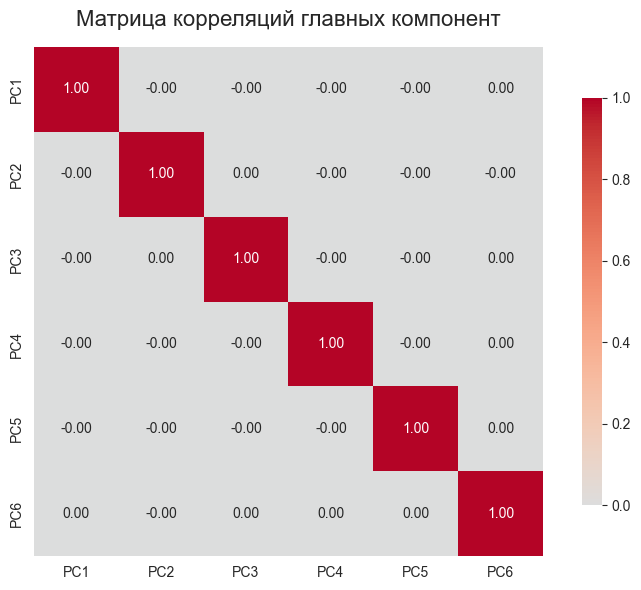

In [90]:
print("="*90)
print("МАТРИЦА КОРРЕЛЯЦИЙ ГЛАВНЫХ КОМПОНЕНТОВ")
print("="*90)

pca_corr_matrix = np.corrcoef(X_train_pca.T)

import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(
    pca_corr_matrix,
    annot=True,
    cmap='coolwarm',
    center=0,
    square=True,
    fmt='.2f',
    cbar_kws={'shrink': 0.8},
    xticklabels=[f'PC{i+1}' for i in range(n_components)],
    yticklabels=[f'PC{i+1}' for i in range(n_components)]
)
plt.title('Матрица корреляций главных компонент', fontsize=16, pad=15)
plt.tight_layout()
plt.show()

off_diag = np.abs(pca_corr_matrix - np.eye(n_components))
max_corr = off_diag.max()

В ходе выполнения лабораторной работы была решена задача предсказания процента жира в теле (BodyFat) по признакам.

### Основные результаты:

1. **Выявлена сильная мультиколлинеарность** исходных признаков
   – VIF достигал 126 (особенно у признаков Weight, Hip, Chest, Abdomen)
   – Матрица корреляций показала множественные связи > 0.8

2. **Лучшая модель на исходных данных**
   – Линейная регрессия: RMSE = 4.612%, R² = 0.5404, MAPE ≈ 20.7%
   – Гребневая регрессия (α=1.0 и α=10.0) показала худшие результаты из-за избыточной регуляризации при достаточном размере выборки

3. **Применение PCA**
   – 6 главных компонент объясняют >=95% общей дисперсии
   – Графики каменистой осыпи и кумулятивной дисперсии подтвердили корректность выбора
   – Матрица корреляций главных компонент близка к нулевой - мультиколлинеарность полностью устранена

4. **Сравнение моделей на PCA-признаках**
   – Линейная регрессия (PCA): R² = 0.514, RMSE = 4.73%
   – Ridge на PCA даёт почти те же результаты, что и линейная (регуляризация не нужна)

5. **Итоговое сравнение**
   | Модель                                | R²     | RMSE   | MAPE  |
   |---------------------------------------|--------|--------|-------|
   | Линейная регрессия (все признаки)     | 0.5404 | 4.612  | 20.7% |
   | Линейная регрессия (6 PCA)            | 0.514  | 4.73   | 22.1% |

### Выводы:

- Антропометрические признаки позволяют объяснить около 54% вариации процента жира в теле — это высокий и реалистичный результат для таких данных.
- Несмотря на сильную мультиколлинеарность, обычная линейная регрессия остаётся лучшей моделью, так как соотношение объектов к признакам (~33:1) достаточно велико.
- PCA успешно устраняет мультиколлинеарность и сокращает размерность в 2 раза при минимальной потере качества (ΔR² ≈ 2.6%).
- Модель на главных компонентах более устойчива, интерпретируема и защищена от переобучения при добавлении новых коррелирующих признаков.
